In [1]:
    import cmeutils
    from cmeutils.structure import gsd_rdf, get_quaternions
    import numpy as np
    import os
    import matplotlib
    import matplotlib.pyplot as plt
    import gsd
    import gsd.hoomd
    import freud

In [2]:
gsdfile = "/Users/bryanwright/diffraction/03181ac1ed56ab3fabce926f85a8245d/trajectory.gsd"

In [3]:
#pcbm_path = "/home/gwenwhite/cmelab/ptb7-itic/pcbm-project/"
#project = signac.get_project(pcbm_path)
#state_dict={"density":[0.6,'g/cm**3'], "kT_reduced":0.6, "tau":0.03}
#job_list= project.find_jobs(state_dict)
#for job in job_list:
#    job_path = job.fn('trajectory.gsd')
#    print(job)

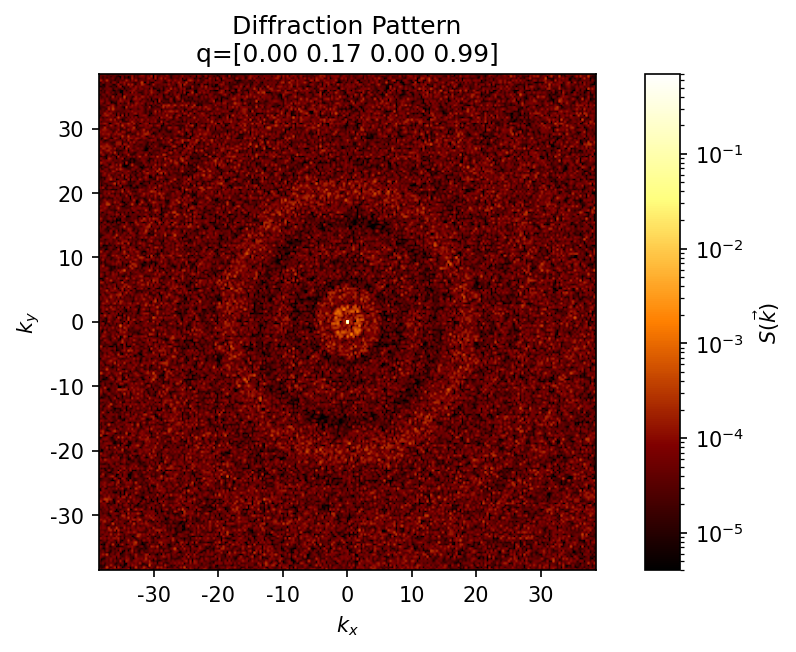

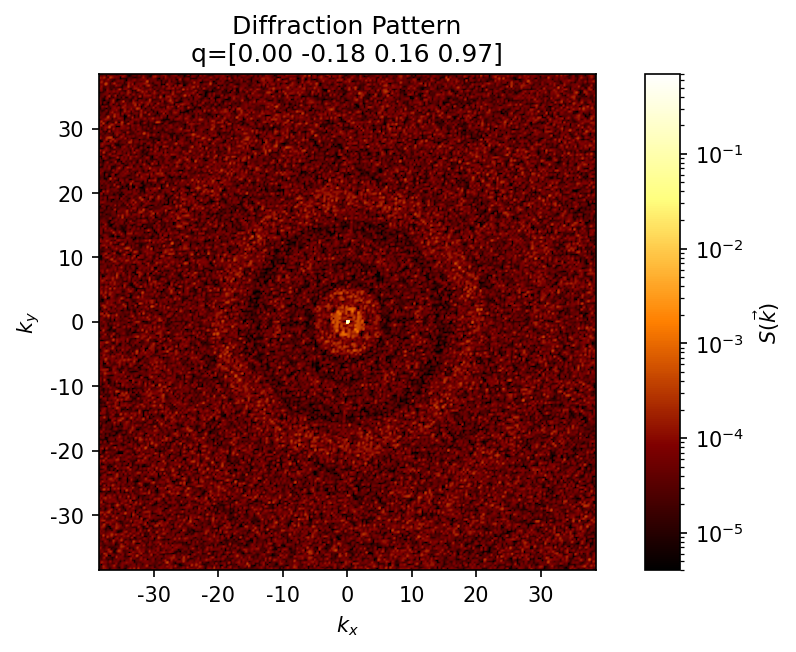

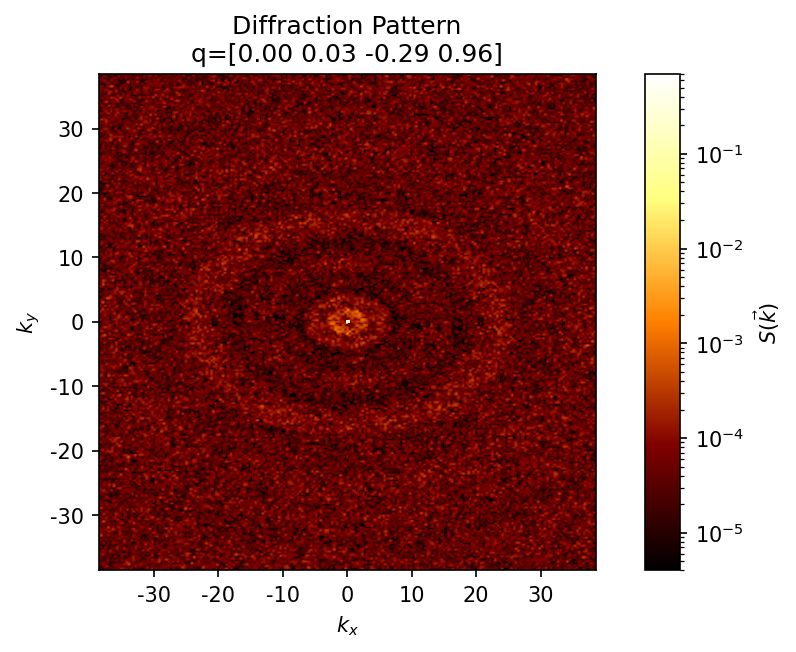

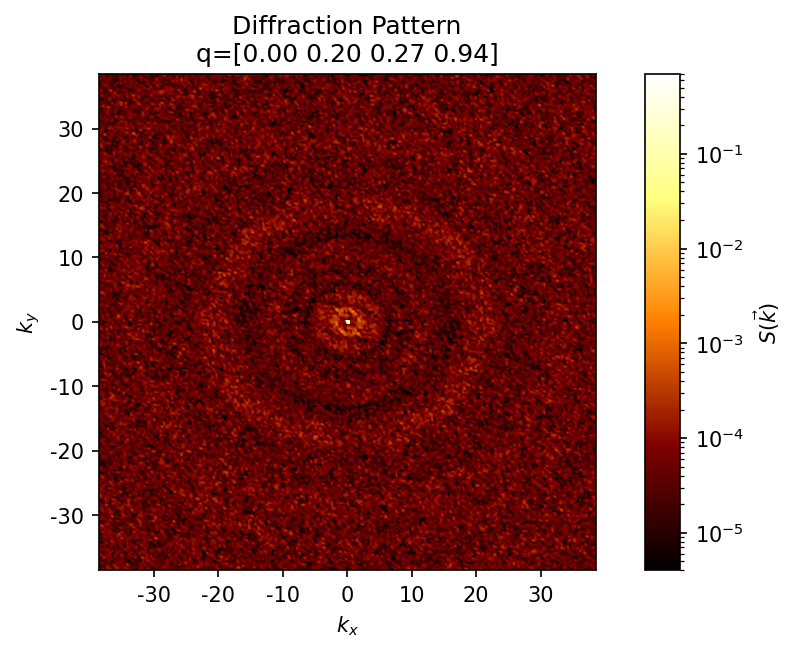

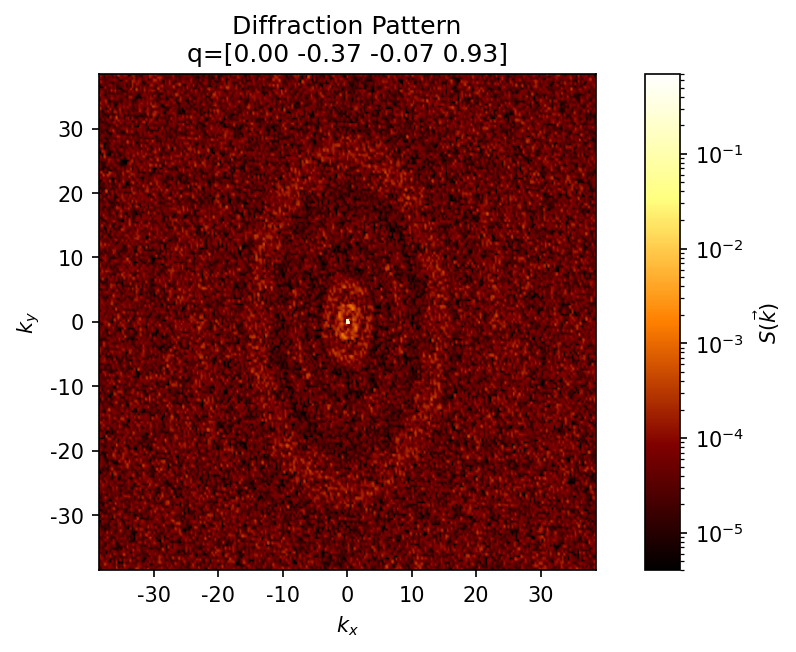

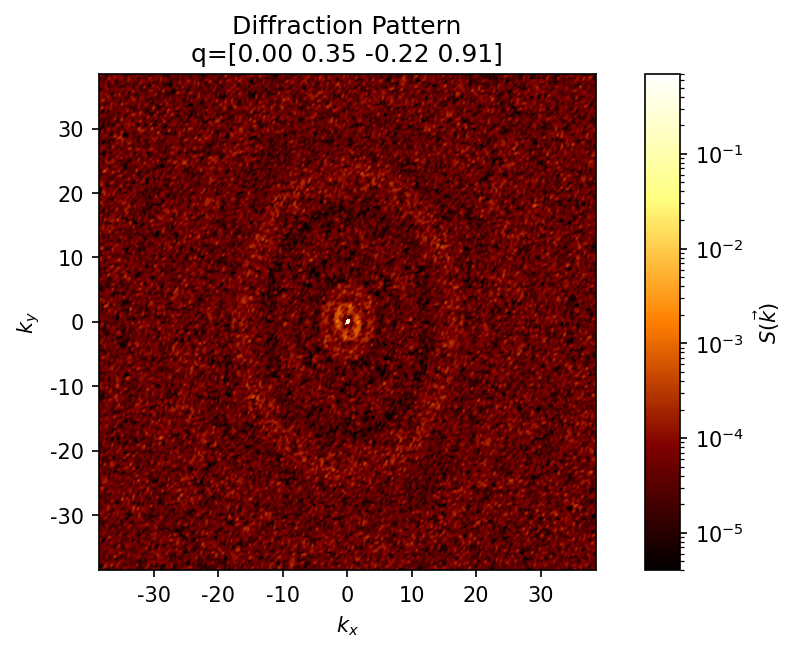

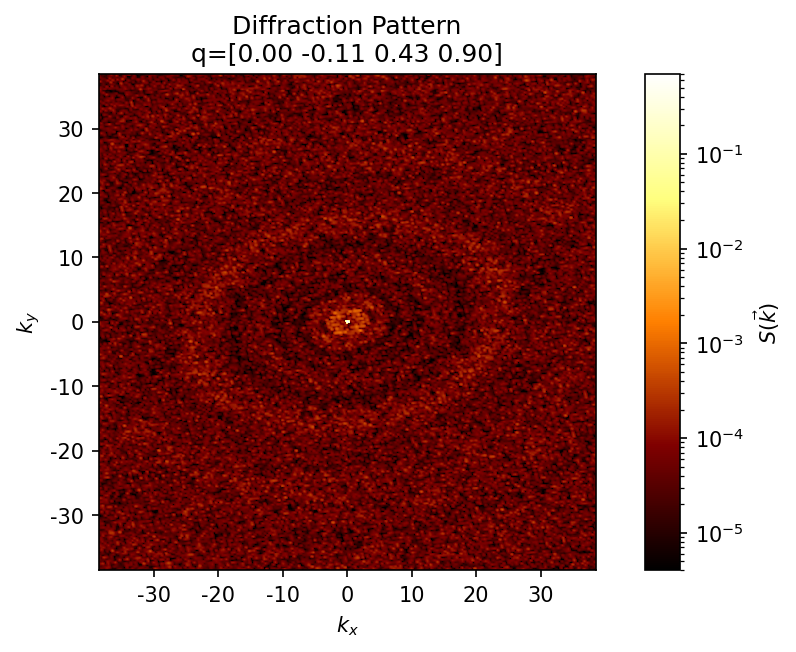

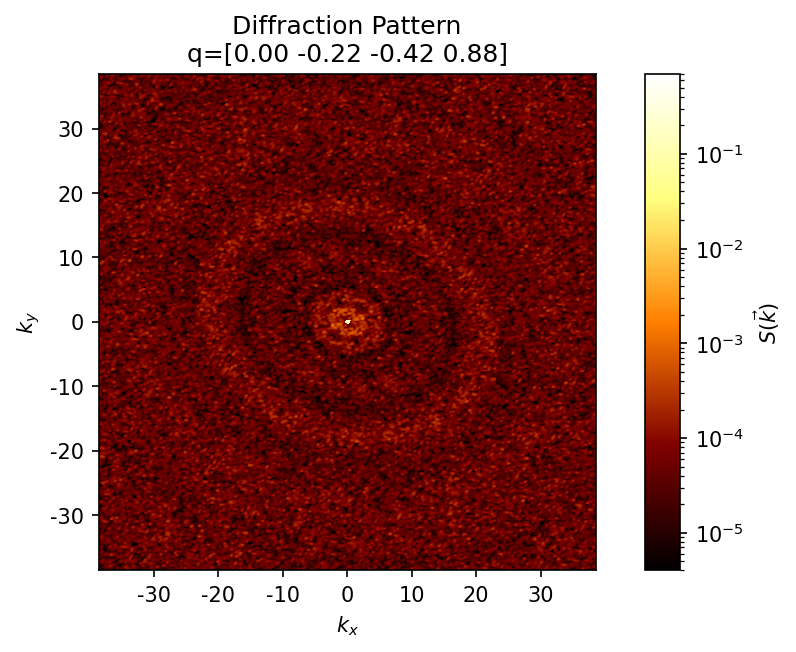

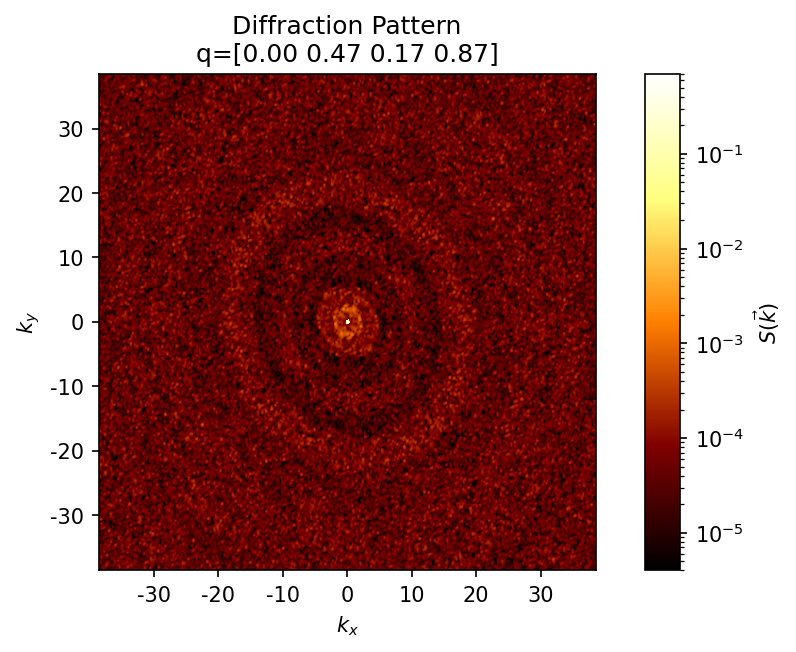

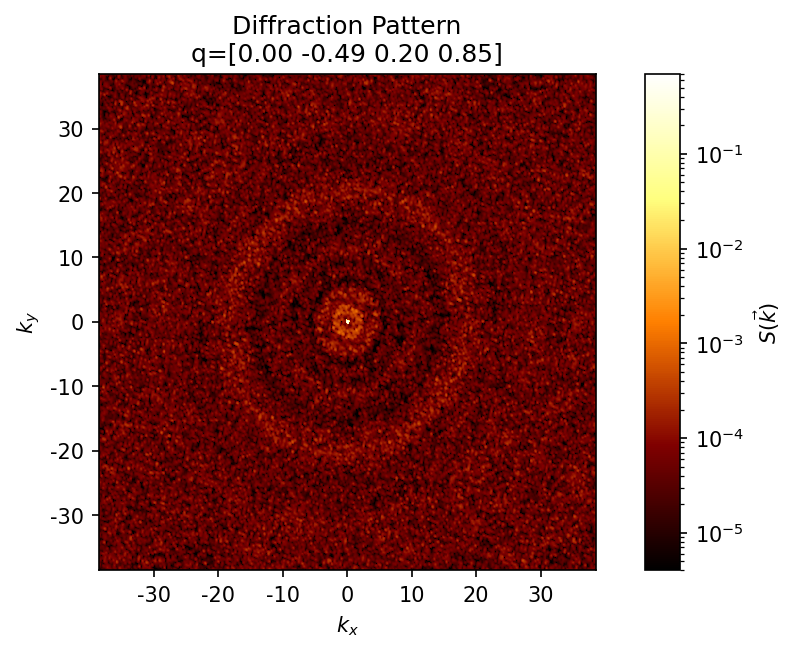

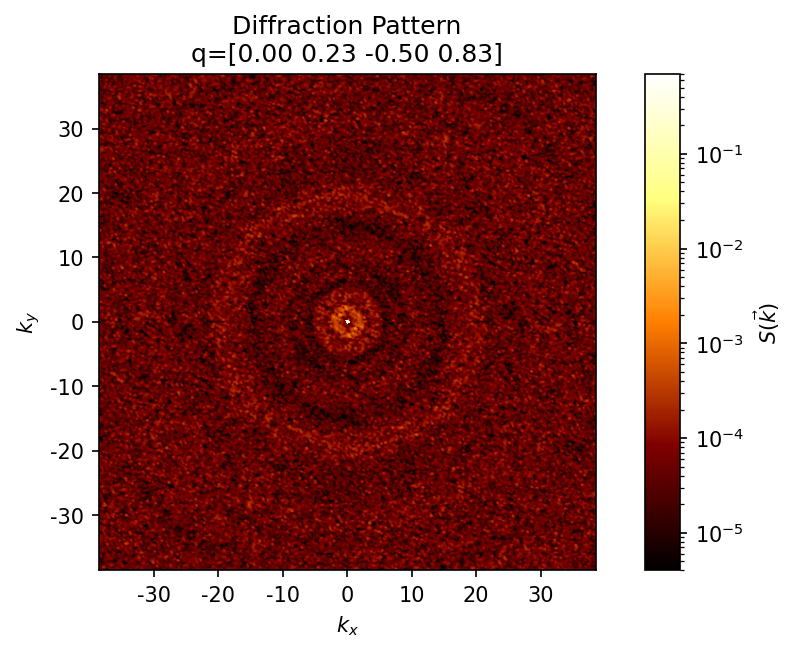

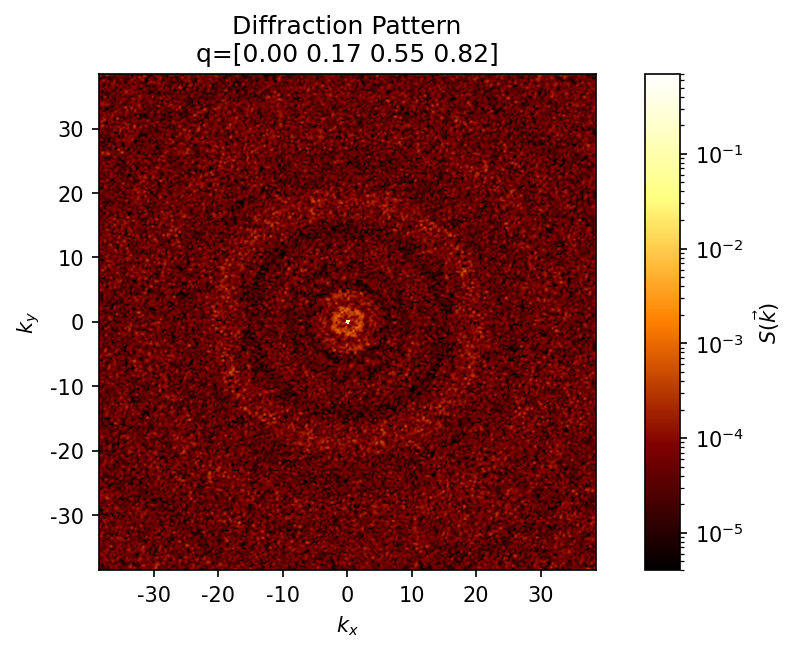

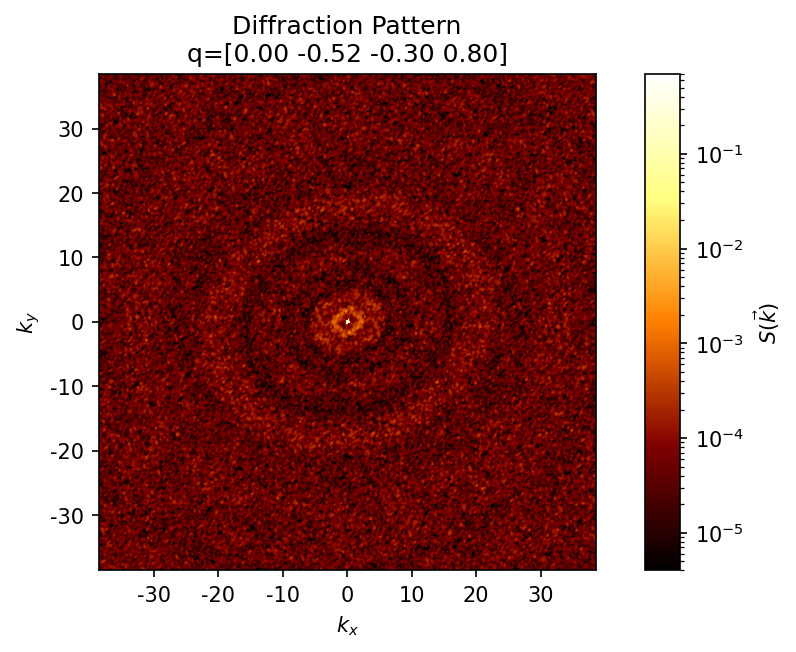

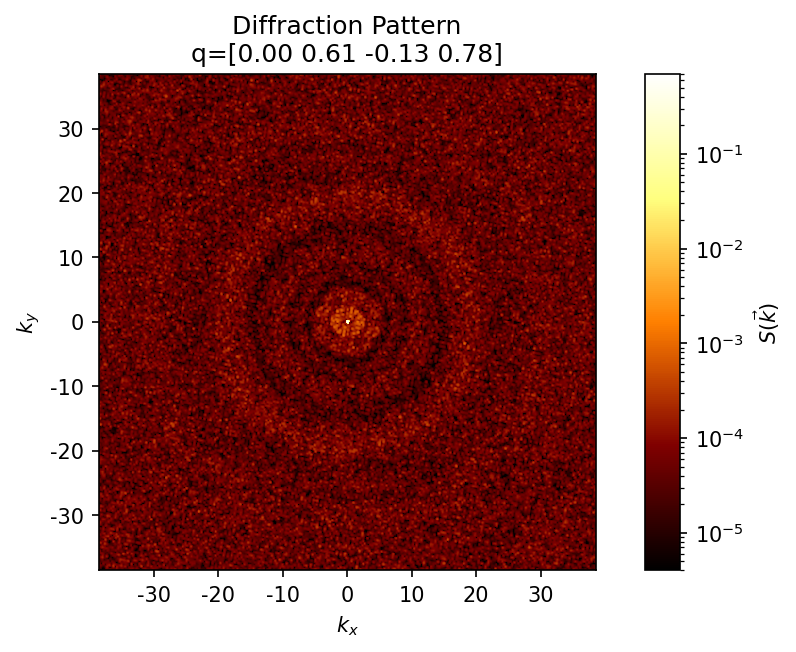

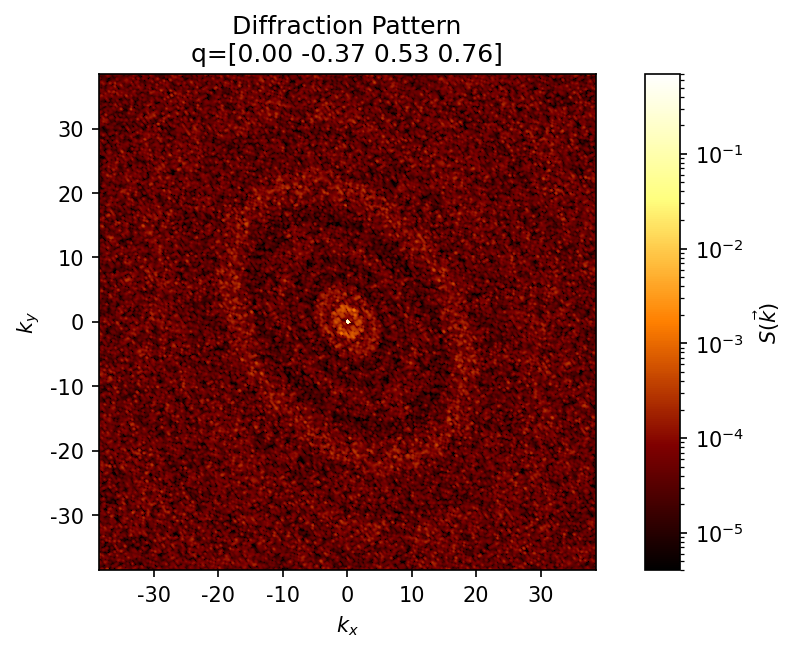

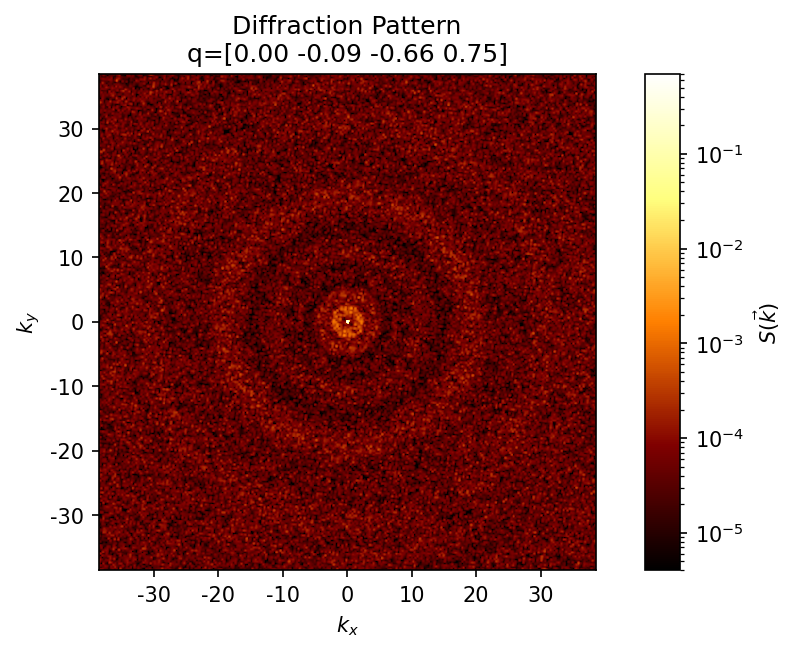

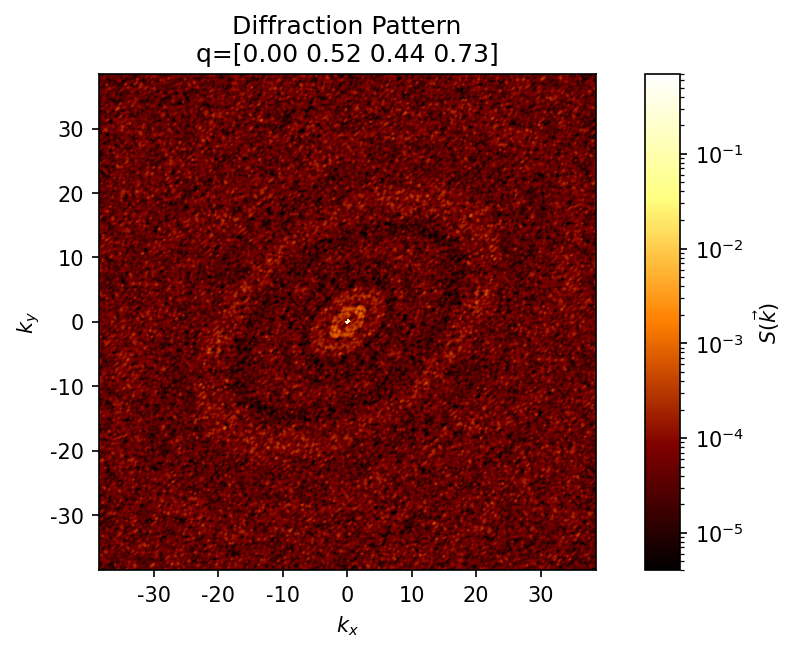

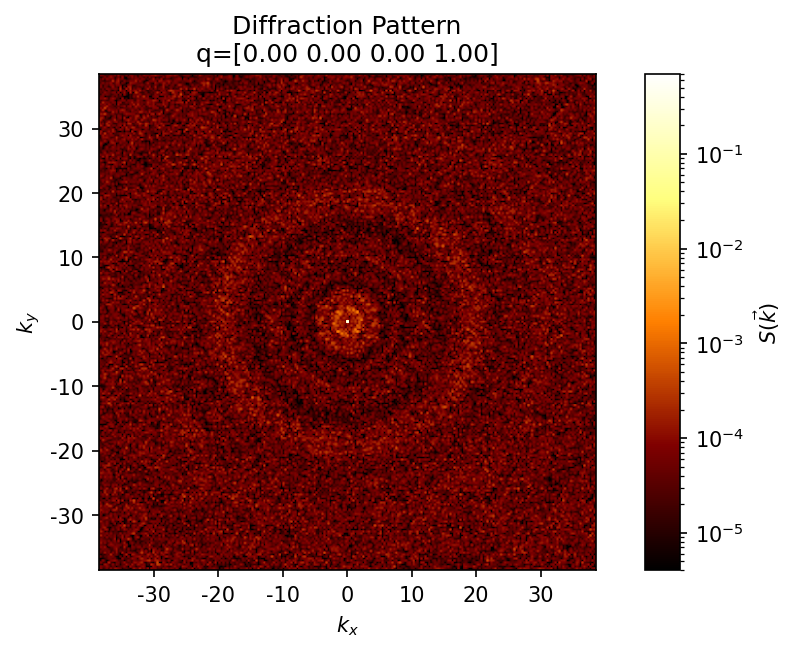

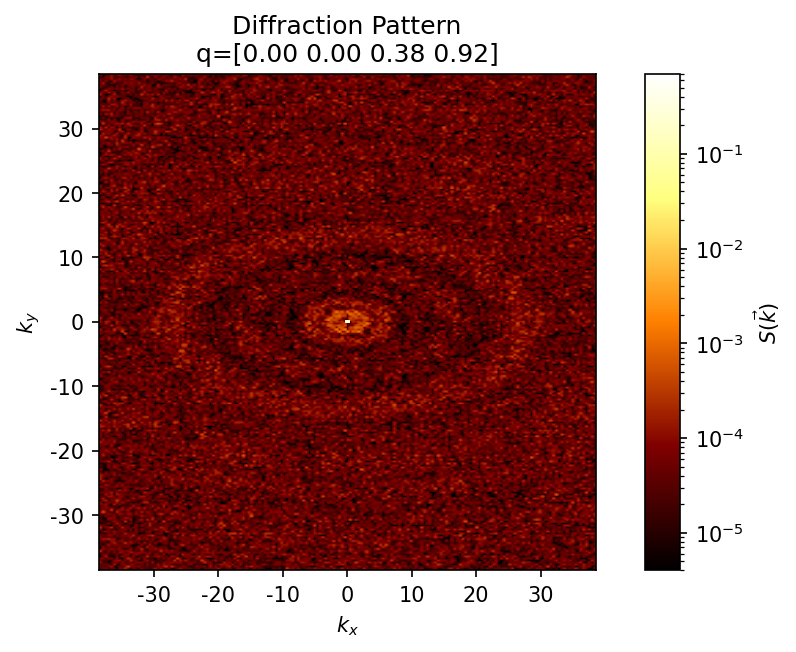

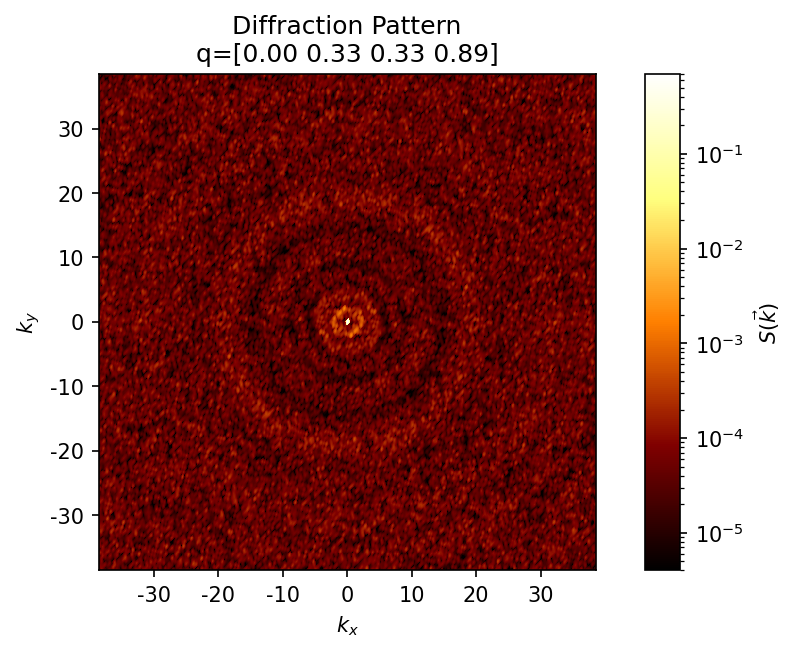

In [4]:
with gsd.hoomd.open(gsdfile) as f:
        snap = f[-1]
        points = snap.particles.position
        box = freud.Box.from_box(snap.configuration.box)
        dp = freud.diffraction.DiffractionPattern(grid_size=1024, output_size=1024)
        os.makedirs(os.path.join("/Users/bryanwright/diffraction/diffraction_plots"))
        for q in get_quaternions():
                fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
                qx, qy, qz, qw = q
                dp.compute((box, points), view_orientation=q)
                dp.plot(ax=ax)
                ax.set_title(f"Diffraction Pattern\nq=[{qx:.2f} {qy:.2f} {qz:.2f} {qw:.2f}]")
                plt.savefig(os.path.join("/Users/bryanwright/diffraction/diffraction_plots/", f"{q}.png"))